<a href="https://colab.research.google.com/github/juvana81/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard (4).csv
Dataset shape: (1000, 31)

First few rows:
            Time        V1        V2        V3        V4        V5        V6  \
233711  147674.0 -4.981898 -0.121752 -2.229536 -0.090148 -0.760316 -1.055487   
49647    44149.0 -0.613681  0.767257  1.540952  0.936414  0.347869 -0.103169   
142676   84873.0 -0.928863  0.170263  1.324478 -2.058290  0.349755 -0.899080   
108313   70847.0 -2.239075  2.095231  0.835383 -0.967684 -0.080408  0.345196   
199319  132904.0 -2.348563 -2.118430  0.968801  0.171939  1.476173 -0.066357   

              V7        V8        V9  ...       V21       V22       V23  \
233711 -0.113240  0.165242  0.696125  ...  0.039089 -0.794481  0.709382   
49647   0.326901  0.136428 -0.778796  ...  0.265330  0.760367 -0.111211   
142676  0.797945 -0.445992 -1.044959  ... -0.287724 -0.576209 -0.030829   
108313 -0.472908 -2.885724  0.305409  ...  2.978045 -0.891543  0.352626   
199319  1.316844 -0.029965  0.564404  ... -0.219381 -1.52

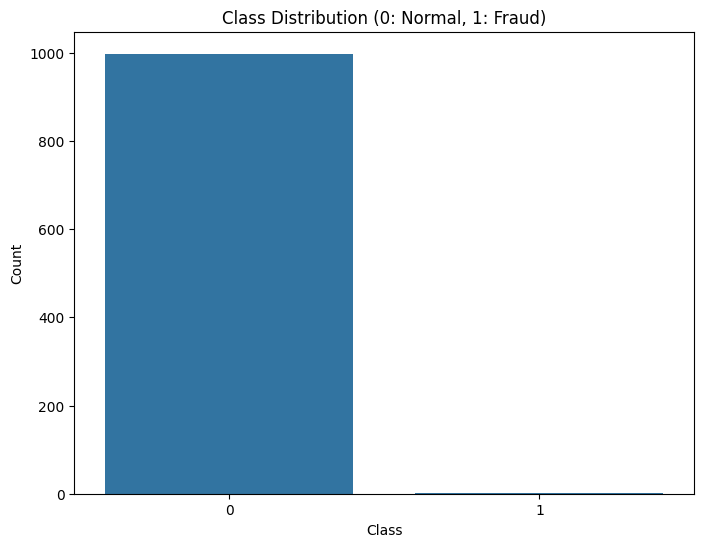

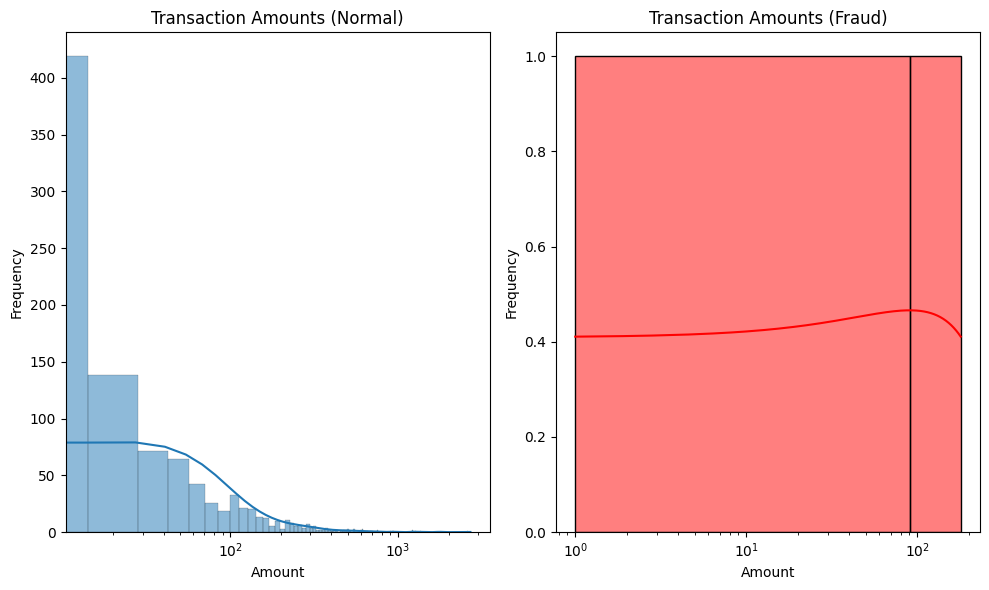

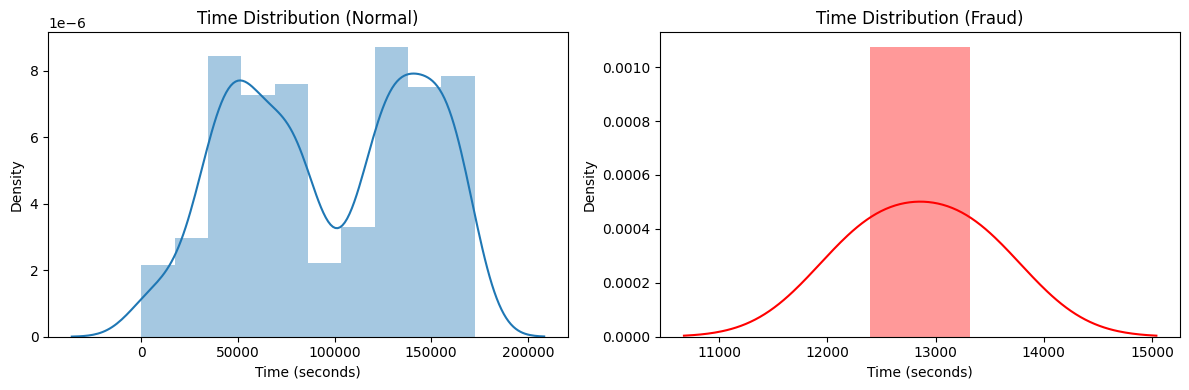

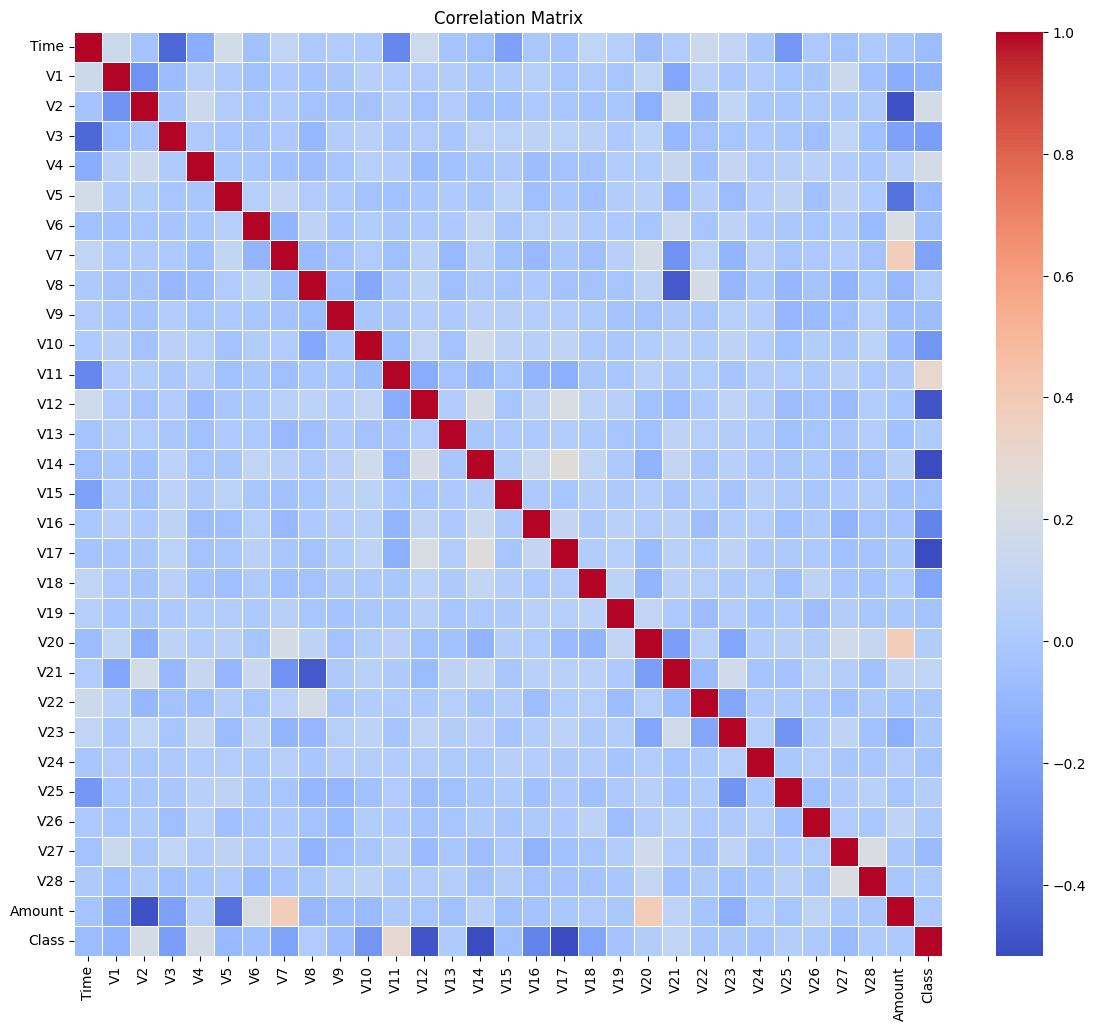

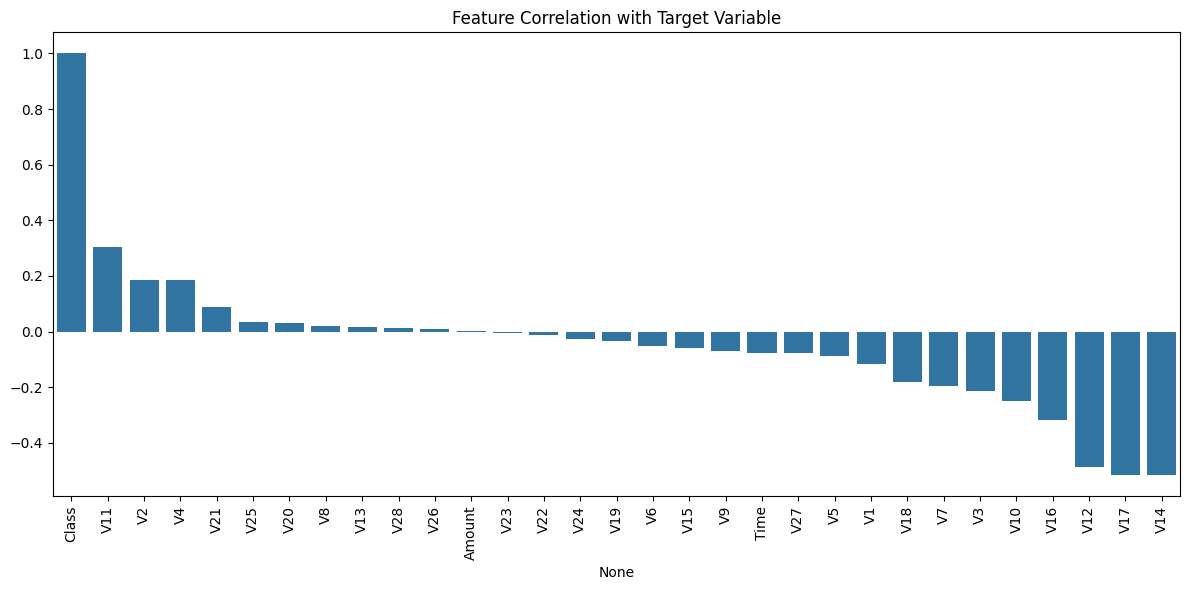


Training set shape: (800, 30)
Testing set shape: (200, 30)
Number of frauds in training set: 2
Number of frauds in testing set: 0

--- Training with imbalanced data ---

Classification Report (Imbalanced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



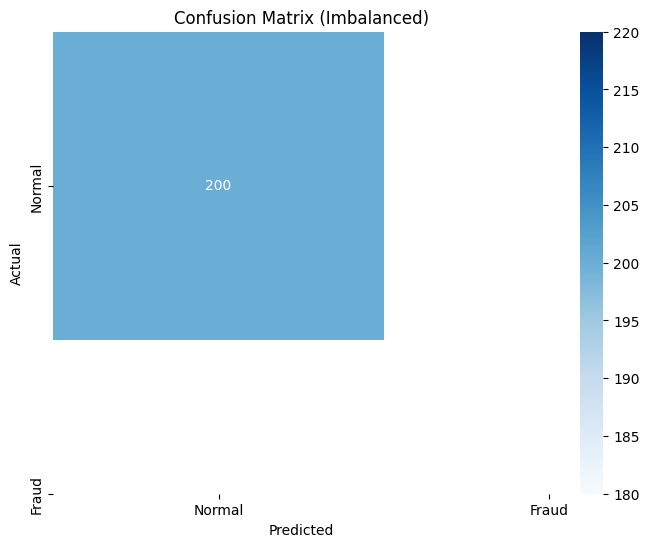


--- Handling class imbalance with SMOTE ---


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2

In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')



from google.colab import files
files.upload()

# Load the dataset
df = pd.read_csv('creditcard.csv')
df = df.sample(1000)

# Basic exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nBasic information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())
print(f"Fraud percentage: {df['Class'].mean() * 100:.4f}%")

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], kde=True)
plt.title('Transaction Amounts (Normal)')
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], kde=True, color='red')
plt.title('Transaction Amounts (Fraud)')
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Time distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(df[df['Class'] == 0]['Time'], kde=True)
plt.title('Time Distribution (Normal)')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.distplot(df[df['Class'] == 1]['Time'], kde=True, color='red')
plt.title('Time Distribution (Fraud)')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Feature correlation
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with target variable
plt.figure(figsize=(12, 6))
correlations = correlation_matrix['Class'].sort_values(ascending=False)
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Feature Correlation with Target Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data preprocessing
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize 'Amount' and 'Time' features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Number of frauds in training set:", sum(y_train == 1))
print("Number of frauds in testing set:", sum(y_test == 1))

# Train a model with imbalanced data
print("\n--- Training with imbalanced data ---")
model_imbalanced = LogisticRegression(max_iter=1000, random_state=42)
model_imbalanced.fit(X_train, y_train)

# Evaluate the model
y_pred_imbalanced = model_imbalanced.predict(X_test)
print("\nClassification Report (Imbalanced):")
print(classification_report(y_test, y_pred_imbalanced))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_imbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Imbalanced)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Handle class imbalance using SMOTE
print("\n--- Handling class imbalance with SMOTE ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE, class distribution:")
print(pd.Series(y_train_smote).value_counts())

# Train a model with balanced data
model_balanced = LogisticRegression(max_iter=1000, random_state=42)
model_balanced.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_balanced = model_balanced.predict(X_test)
print("\nClassification Report (Balanced with SMOTE):")
print(classification_report(y_test, y_pred_balanced))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Balanced with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train a Random Forest model
print("\n--- Training Random Forest model ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# ROC curve and AUC for all models
plt.figure(figsize=(10, 8))

# Logistic Regression (Imbalanced)
y_pred_proba_imbalanced = model_imbalanced.predict_proba(X_test)[:, 1]
fpr_imbalanced, tpr_imbalanced, _ = roc_curve(y_test, y_pred_proba_imbalanced)
roc_auc_imbalanced = auc(fpr_imbalanced, tpr_imbalanced)
plt.plot(fpr_imbalanced, tpr_imbalanced, label=f'LR Imbalanced (AUC = {roc_auc_imbalanced:.3f})')

# Logistic Regression (Balanced with SMOTE)
y_pred_proba_balanced = model_balanced.predict_proba(X_test)[:, 1]
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_pred_proba_balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)
plt.plot(fpr_balanced, tpr_balanced, label=f'LR with SMOTE (AUC = {roc_auc_balanced:.3f})')

# Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall curve
plt.figure(figsize=(10, 8))

# Logistic Regression (Imbalanced)
precision_imbalanced, recall_imbalanced, _ = precision_recall_curve(y_test, y_pred_proba_imbalanced)
plt.plot(recall_imbalanced, precision_imbalanced, label='LR Imbalanced')

# Logistic Regression (Balanced with SMOTE)
precision_balanced, recall_balanced, _ = precision_recall_curve(y_test, y_pred_proba_balanced)
plt.plot(recall_balanced, precision_balanced, label='LR with SMOTE')

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Hyperparameter tuning for Random Forest
print("\n--- Hyperparameter tuning for Random Forest ---")
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

print("\nBest parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nClassification Report (Best Random Forest):")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Best Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Find the optimal threshold for the model
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_best_rf)

# Create a DataFrame for evaluation at different thresholds
threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision[:-1],
    'Recall': recall[:-1],
    'F1': 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
})

# Find the threshold that maximizes F1 score
optimal_idx = threshold_df['F1'].idxmax()
optimal_threshold = threshold_df.loc[optimal_idx, 'Threshold']
optimal_f1 = threshold_df.loc[optimal_idx, 'F1']
optimal_precision = threshold_df.loc[optimal_idx, 'Precision']
optimal_recall = threshold_df.loc[optimal_idx, 'Recall']

print(f"\nOptimal threshold: {optimal_threshold:.4f}")
print(f"At this threshold - Precision: {optimal_precision:.4f}, Recall: {optimal_recall:.4f}, F1: {optimal_f1:.4f}")

# Plot the precision-recall curve with the optimal threshold
plt.figure(figsize=(10, 8))
plt.plot(threshold_df['Recall'], threshold_df['Precision'], label='Precision-Recall curve')
plt.scatter(optimal_recall, optimal_precision, c='red', s=100, label=f'Optimal threshold: {optimal_threshold:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Optimal Threshold')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Apply the optimal threshold
y_pred_optimal = (y_pred_proba_best_rf >= optimal_threshold).astype(int)
print("\nClassification Report (Best Random Forest with Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix (Best Random Forest with Optimal Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Function to predict on new data
def predict_fraud(transaction_data, model, threshold=0.5):

    # Ensure the data has the correct format
    if not isinstance(transaction_data, pd.DataFrame):
        transaction_data = pd.DataFrame([transaction_data])

    # Scale the Amount and Time features if they exist
    if 'Amount' in transaction_data.columns:
        transaction_data['Amount'] = scaler.transform(transaction_data['Amount'].values.reshape(-1, 1))
    if 'Time' in transaction_data.columns:
        transaction_data['Time'] = scaler.transform(transaction_data['Time'].values.reshape(-1, 1))

    # Make predictions
    probabilities = model.predict_proba(transaction_data)[:, 1]
    predictions = (probabilities >= threshold).astype(int)

    return predictions, probabilities

# Example usage of the prediction function
sample_transaction = X_test.iloc[0].to_dict()

# Make a prediction
prediction, probability = predict_fraud(sample_transaction, best_rf_model, optimal_threshold)
print(f"\nSample prediction: {'Fraud' if prediction[0] == 1 else 'Normal'} (Probability of fraud: {probability[0]:.4f})")

# Save the model for future use
import joblib
joblib.dump(best_rf_model, 'fraud_detection_model.pkl')
print("\nModel saved as 'fraud_detection_model.pkl'")

# Save the scaler for future use
joblib.dump(scaler, 'fraud_detection_scaler.pkl')
print("Scaler saved as 'fraud_detection_scaler.pkl'")

print("\n--- Summary of results ---")
print(f"1. Best model: Random Forest with {best_rf_model.n_estimators} trees")
print(f"2. Optimal threshold: {optimal_threshold:.4f}")
print(f"3. Best F1 score: {optimal_f1:.4f}")
print(f"4. Precision at optimal threshold: {optimal_precision:.4f}")
print(f"5. Recall at optimal threshold: {optimal_recall:.4f}")
print("\nConclusion: This model can be used to detect fraudulent credit card transactions with good accuracy.")